## 사이킷런을 이용한 보스턴 주택 가격 예측

### LinearRegression 클래스 - Ordinary Least Squares

예측값과 실제 값의 RSS를 최소화해 추정 방식으로 구현한 클래스

### 회귀 평가 지표

https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-17-%ED%9A%8C%EA%B7%80-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C

MAE(Meda Absolue Error) : 실제 값, 예측 값 차이를 절대값으로 변환해 평균  
MSE(Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균  
RMSE(Root Mean Squared Error) : 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성 때문에 루트를 씌운 RMSE사용  
MSLE(Mean Squared log Error) : MSE에 로그 적용  
RMSLE(Root Mean Squared Log Error) : RMSE에 로그 적용

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

In [4]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df["PRICE"] = boston.target

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


시각화

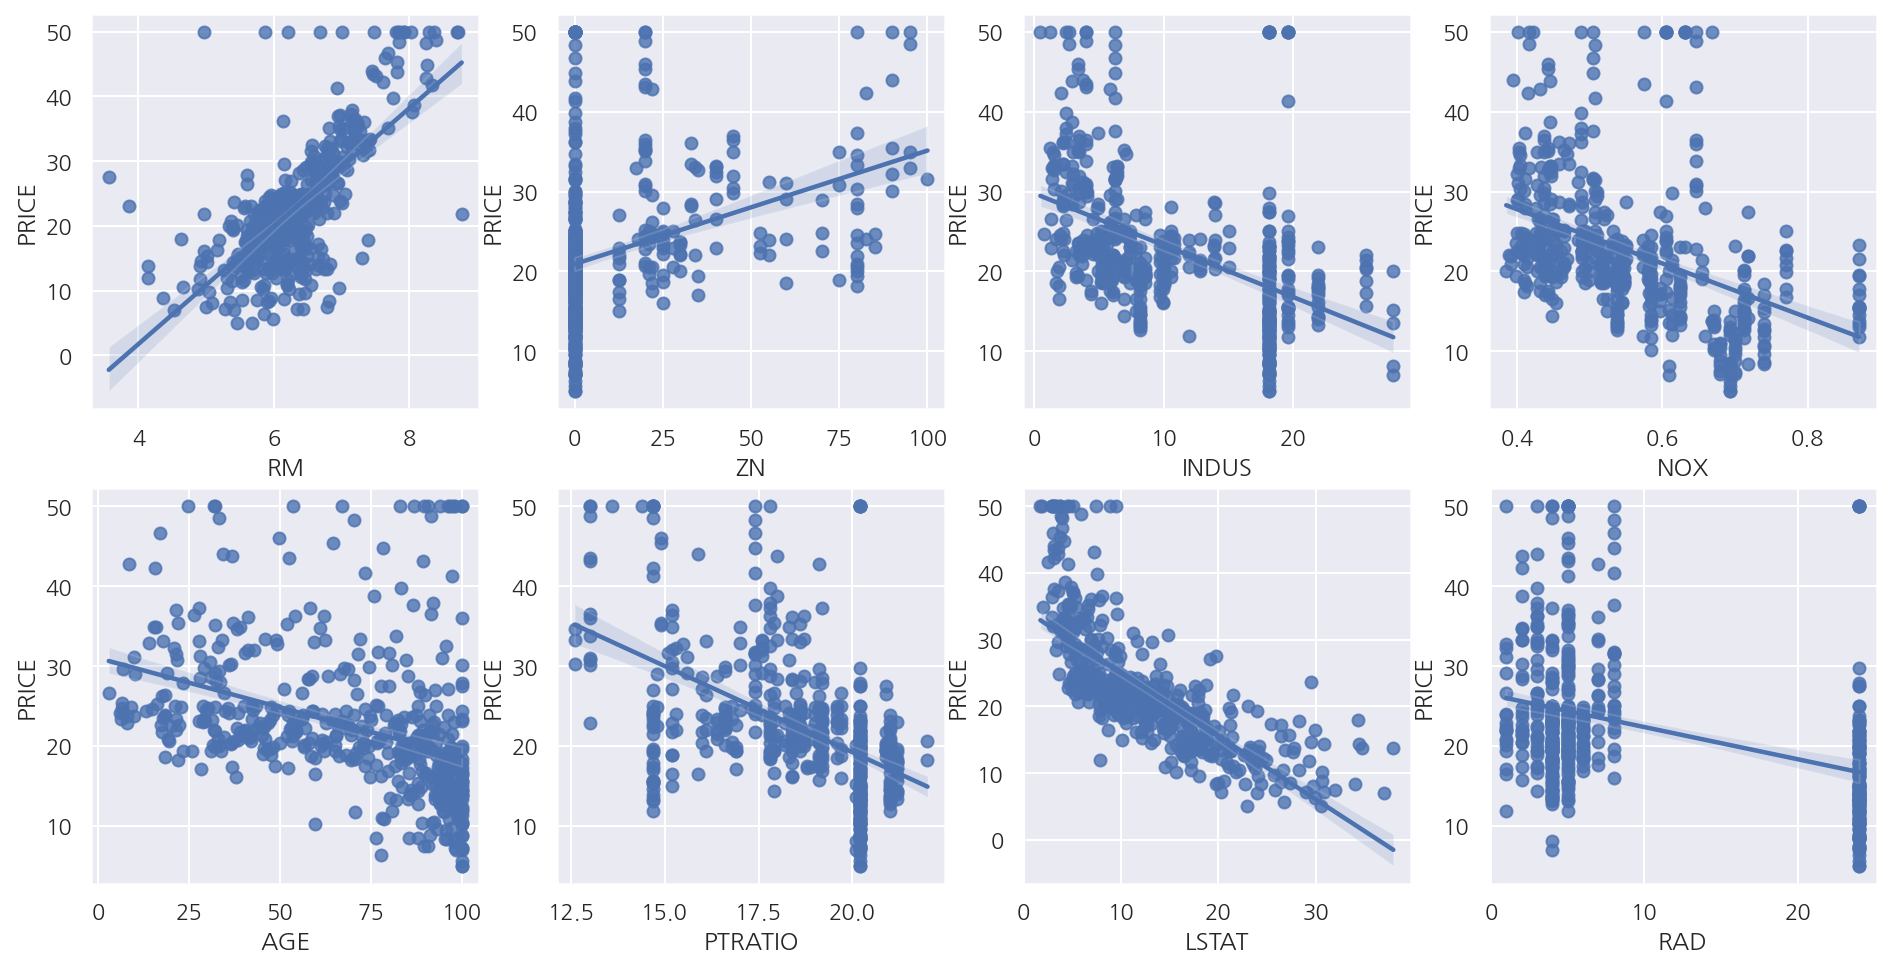

In [6]:
fig, axs = plt.subplots(2,4, figsize=(16,8))

lm_features = ["RM", "ZN", "INDUS", "NOX", "AGE", "PTRATIO", "LSTAT", "RAD"]
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    # sns.regplot
    sns.regplot(x = feature, y = "PRICE", data = boston_df, ax = axs[row,col])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_data = boston_df.iloc[:,:-1]
y_target = boston_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS 학습/예측/평가
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}, RMSE: {rmse:.3f}")
print(f"Variance score: {r2:.3f}")

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [8]:
coef = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coef.loc["intercept"] = np.round(lr.intercept_, 1)
coef.sort_values(ascending = False)

intercept    41.0
RM            3.4
CHAS          3.0
RAD           0.4
ZN            0.1
INDUS         0.0
AGE           0.0
TAX          -0.0
B             0.0
CRIM         -0.1
LSTAT        -0.6
PTRATIO      -0.9
DIS          -1.7
NOX         -19.8
dtype: float64

In [9]:
from sklearn.model_selection import cross_val_score

X_data = boston_df.iloc[:,:-1]
y_target = boston_df.iloc[:,-1]

lr = LinearRegression()

# cross_val_score
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt( -1 * neg_mse_scores )
avg_rmse = np.mean(rmse_scores)

print(f'5 folds의 개별 Negative MSE scores: {np.round(neg_mse_scores,2)}')
print(f'5 folds의 개별 RMSE scores: {np.round(rmse_scores,2)}')
print(f'5 folds의 평균 RMSE: {avg_rmse:.3f}')

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829
